<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_12_Decision_Trees_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Classifier**

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.

One way to think of a Machine Learning classification algorithm is that it is built to make decisions.

You usually say the model predicts the class of the new, never-seen-before input but, behind the scenes, the algorithm has to decide which class to assign.

Some classification algorithms are probabilistic, like Naive Bayes, but there’s also a rule-based approach.

We humans, also make rule-based decisions all the time.

When you’re planning your next vacation, you use a rule-based approach. You might pick a different destination based on how long you’re going to be on vacation, the budget available or if your extended family is coming along.

The answer to these questions informs the final decision. And if you continually narrow down the available vacation destinations based on how you answer each question, you can visualize this decision process as a (decision) tree.

# A tree that makes decisions
Decision trees can perform both classification and regression tasks, so you’ll see authors refer to them as **CART algorithm: Classification and Regression Tree.** This is an umbrella term, applicable to all tree-based algorithms, not just decision trees.

But let’s focus on decision trees for classification.

The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.

With this process you’re organizing the data in a tree structure.

Every time you ask a question you’re adding a node to the tree. And the first node is called the **root node.**

The result of asking a question splits the dataset based on the value of a feature, and creates new nodes.

If you decide to stop the process after a split, the last nodes created are called **leaf nodes.**



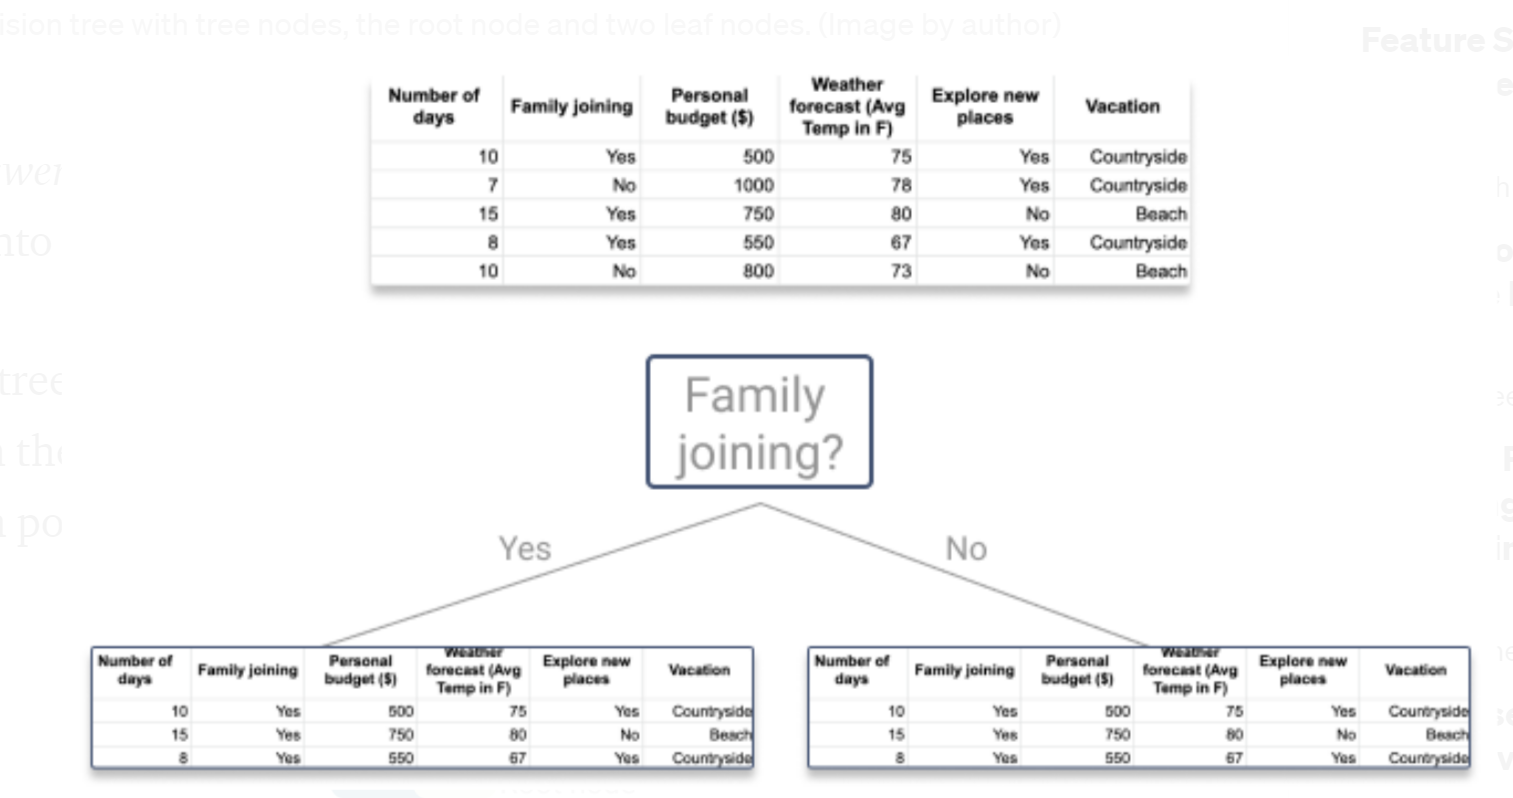

Every time you answer a question, you’re also creating branches and segmenting the feature space into disjoint **regions[1].**

One branch of the tree has all data points corresponding to answering Yes to the question the rule in the previous node implied. The other branch has a node with the remaining data points.

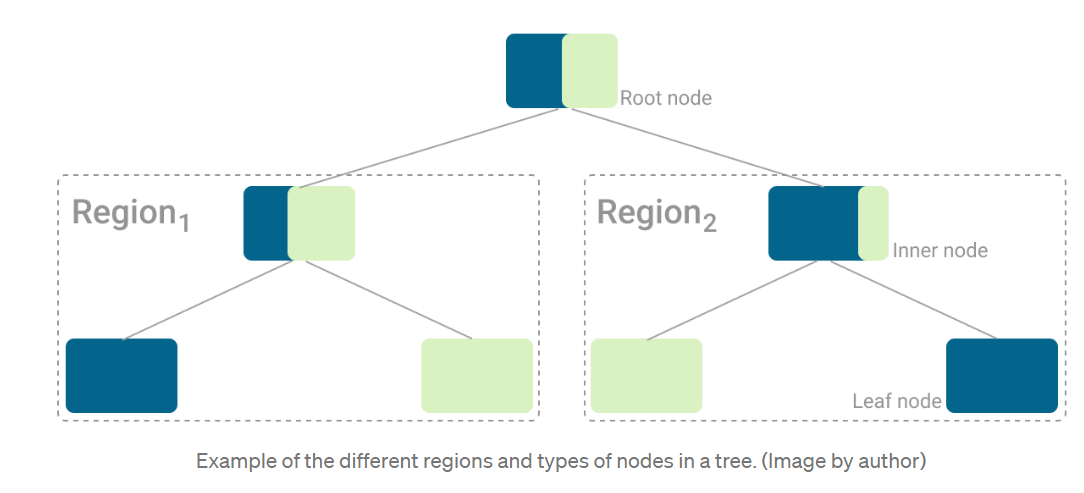

This way you narrow down the feature space with each split or branch in the tree, and each data point will only belong to one region.

The goal is to continue to splitting the feature space, and applying rules, until you don’t have any more rules to apply or no data points left.

Then, it’s time to assign a class to all data points in each leaf node.

# Assigning a class

The algorithm tries to completely separate the dataset such that all leaf nodes, i.e., the nodes that don’t split the data further, belong to a single class. These are called pure leaf nodes.

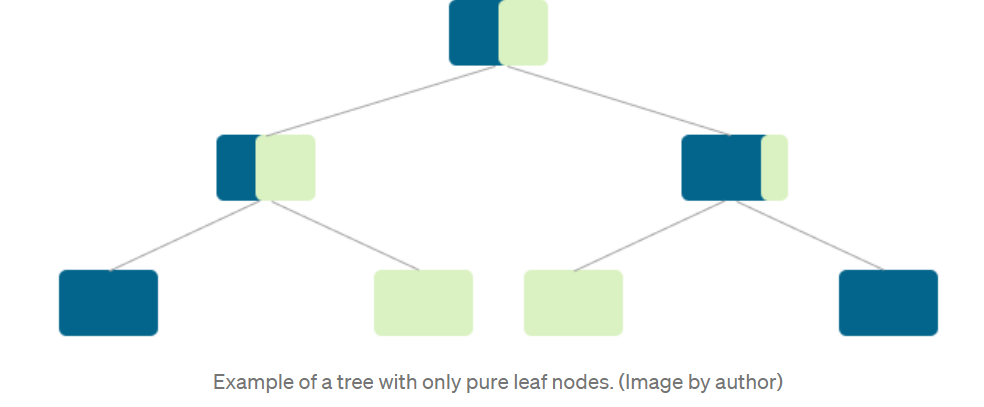

But most times you end up with mixed leaf nodes, where not all data points have to the same class.



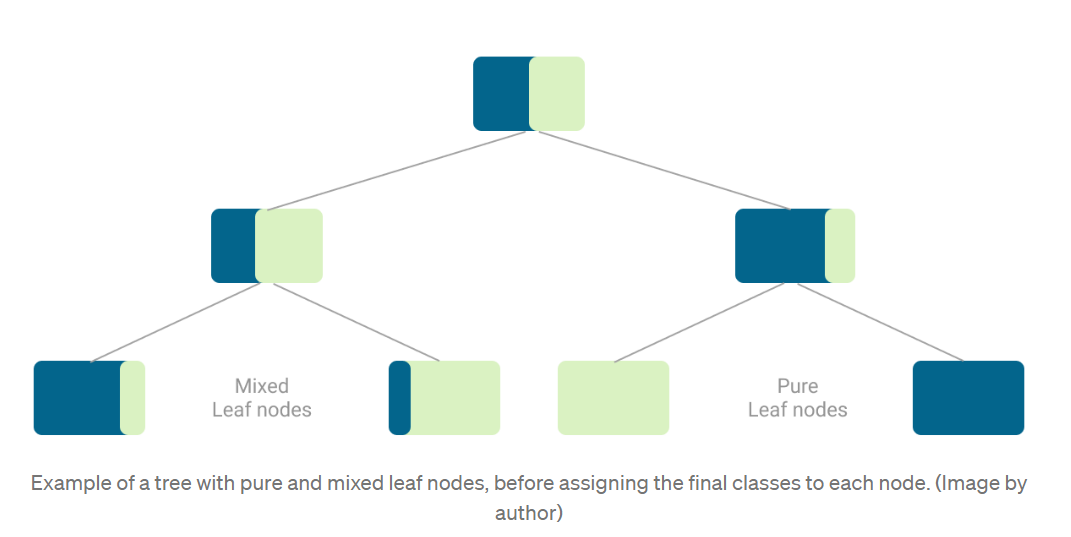

In the end, the **algorithm can only assign one class** to the data points in each leaf node.

With pure leaf nodes that already taken care of, because all data points in that node have the same class.

But with mixed leaf nodes the algorithm assigns **the most common class** among all data points in that node.

# Picking the best split
On every split, the algorithm tries to divide the dataset into the smallest subset possible[2]. So, like any other Machine Learning algorithm, the goal is to minimize the loss function as much as possible.

A popular loss function for classification algorithms is **Stochastic Gradient Descent** but, it requires the loss function to be differentiable. So, it’s not an option in this case.

But since you’re separating data points that belong to different classes, the loss function should evaluate a split based on the proportion of data points belonging to each class before and after the split.

Decision Tree use loss functions that evaluate the split based on the purity of the resulting nodes.

n order words, you’d want a loss function that evaluates the split based on the purity of the resulting nodes. A loss function that compares the class distribution before and after the split[2], like **Gini Impurity and Entropy.**

# Gini Impurity
Gini Impurity is measure of variance across the different classes[1].

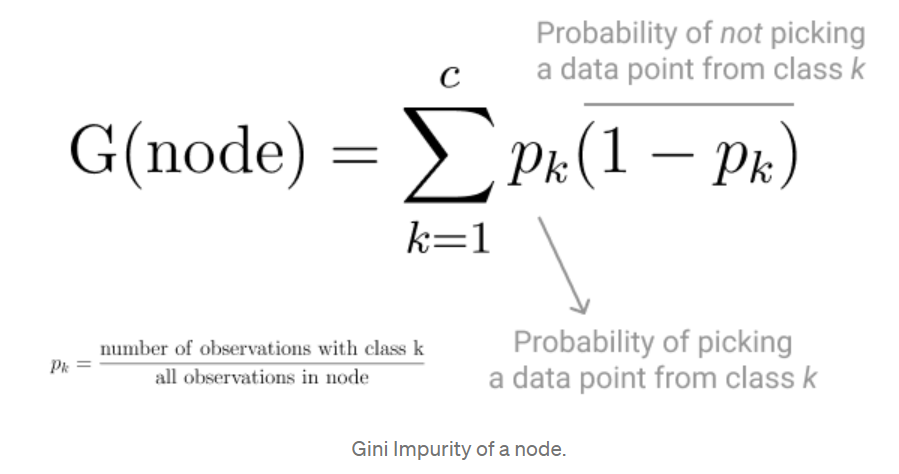

#Entropy
Similarly to Gini Impurity, Entropy is a measure of chaos within the node. And chaos, in the context of decision trees, is having a node where all classes are equally present in the data.

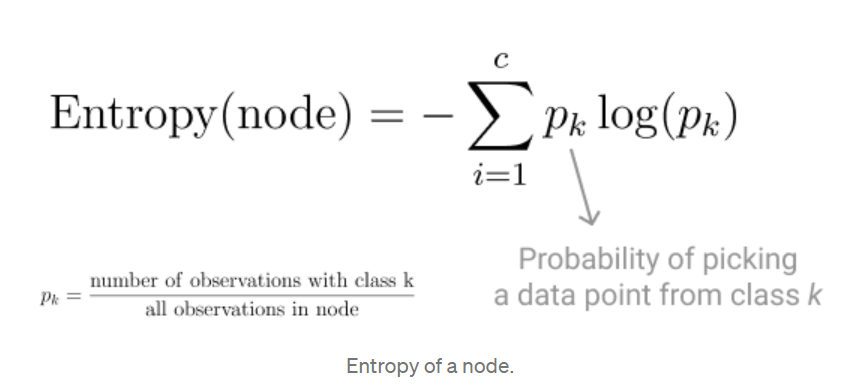

Using Entropy as loss function, a split is only performed if the Entropy of each the resulting nodes is lower than the Entropy of the parent node. Otherwise, the split is not locally optimal.

## Why you want to use Decision Trees
Even though Decision trees is a simple algorithm, it has several advantages:

Interpretability you can visualize the decision tree.

No preprocessing required you don’t need to prepare the data before building the model.

Data robustness the algorithm handles all types of data nicely.

# Interpretability: visualizing trees
One of the biggest advantages of tree-based algorithms it that you can actually visualize the model.

You can see the decisions the algorithm made, and how it classified the different data points.

This is a major advantage, because most algorithms work like blackboxes, and it’s hard to clearly pinpoint what made the algorithm predict a specific result.

# No preprocessing required
Several machine learning algorithms require feature values to be as similar as possible, so the algorithm can best interpret how the changes in those features impact the target.

The most common preprocessing requirement is feature normalization, so all features in the same scale and any change in those values has the same proportional weight.

The rules in tree-based algorithms are built around each individual feature, instead of considering the entire feature set. Each decision is made looking at one feature at a time, so their values don’t need to be normalized.

# Data robustness
Tree-based algorithms are great at handling different data types. Your dataset can have a mix of numerical and categorical data, and you won’t need to encode any of the categorial features.

This is an item on the pre-processing checklist that tree-based algorithms handle on their own.

# Picking a vacation destination
Planning the next vacation can be challenging. Vacations are never long enough, there are budget constraints, and sometimes the extended family wants to come along, which makes logistics more complicated.

You like the idea of asking for a second opinion, from an algorithm, when it’s time to make a decision that involves way too many variables to keep track of. Picking a vacation destination is a perfect example!

Whenever you start planning a vacation, you always take into account:

* Duration of the vacation,

* Personal budget,

* Weather forecast,

* If your extended family is joining,

* If you’re feeling adventurous and want to explore new places.

Since Decision Trees are said to mimic how humans make decisions, that’s the algorithm you’re using.

The bonus piece it that, in the end, you’ll be able to visualize the decision tree and see how the algorithm picked the destination.

Thinking through your decision process for previous vacations and the criteria you always take into consideration, you put together a dataset.

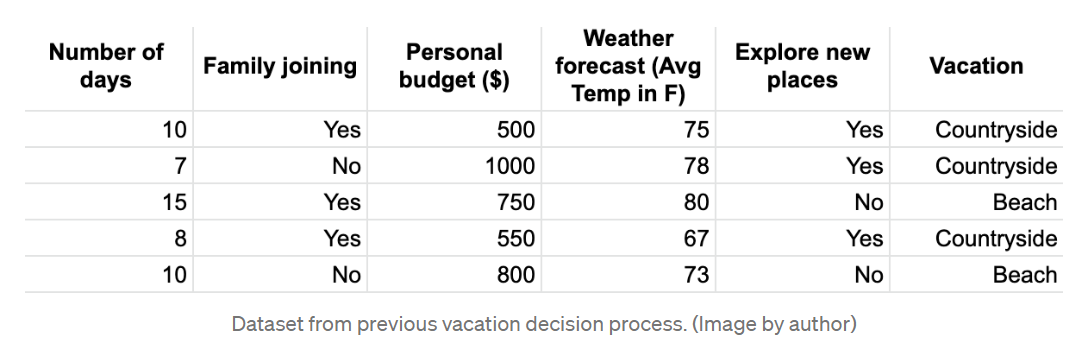

Even though the Decision Tree algorithm can handle different data types, ScikitLearn’s current implementation doesn’t support categorical data.

To use the Decision Tree classifier from ScikitLearn, you can’t skip the pre-processing step and need to encode all categorical features and targets before training the model.

In [1]:
import numpy as np
from sklearn import preprocessing

def encode_feature(array):
    """ Encode a categorical array into a number array
    
    :param array: array to be encoded
    :return: numerical array
    """
  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)
feature_names = ['number_days', 'family_joining', 'personal_budget', 'weather_forecast', 'explore_new_places']
class_names = ['Countryside', 'Beach']

features = np.array([[10, 'Yes', 950, 75, 'Yes'],
                     [10, 'Yes', 250, 78, 'Yes'],
                     [7, 'Yes', 600, 80, 'No'],
                     [8, 'Yes', 750, 67, 'Yes'],
                     [10, 'Yes', 800, 73, 'Yes'],
                     [8, 'Yes', 850, 64, 'Yes'],
                     [15, 'No', 350, 78, 'No'],
                     [8, 'Yes', 850, 81, 'Yes'],
                     [6, 'No', 750, 59, 'Yes'],
                     [12, 'Yes', 1050, 54, 'Yes'],
                     [10, 'No', 230, 74, 'No'],
                     [3, 'Yes', 630, 74, 'Yes'],
                     [10, 'Yes', 830, 74, 'No'],
                     [12, 'No', 730, 52, 'Yes']])
# Encoding categorical features
features[:, 1] = encode_feature(features[:, 1])
features[:, 4] = encode_feature(features[:, 4])
targets = np.array(['Countryside','Beach','Beach','Countryside',
                    'Beach', 'Countryside', 'Beach','Countryside',
                    'Beach', 'Beach', 'Countryside','Countryside',
                    'Beach', 'Beach'])
targets = encode_feature(targets)

Pre-processing: Done ✅

Now it’s time to build and visualize the Decision Tree.

|--- family_joining <= 0.50
|   |--- class: 0
|--- family_joining >  0.50
|   |--- personal_budget <= 615.00
|   |   |--- class: 0
|   |--- personal_budget >  615.00
|   |   |--- number_days <= 9.00
|   |   |   |--- class: 1
|   |   |--- number_days >  9.00
|   |   |   |--- weather_forecast <= 74.50
|   |   |   |   |--- class: 0
|   |   |   |--- weather_forecast >  74.50
|   |   |   |   |--- class: 1

  number_days family_joining personal_budget weather_forecast  \
0    0.261905       0.214286        0.261905         0.261905   

  explore_new_places  
0                0.0  
Training Set Mean Accuracy = 1.0
Test Set Mean Accuracy = 0.67


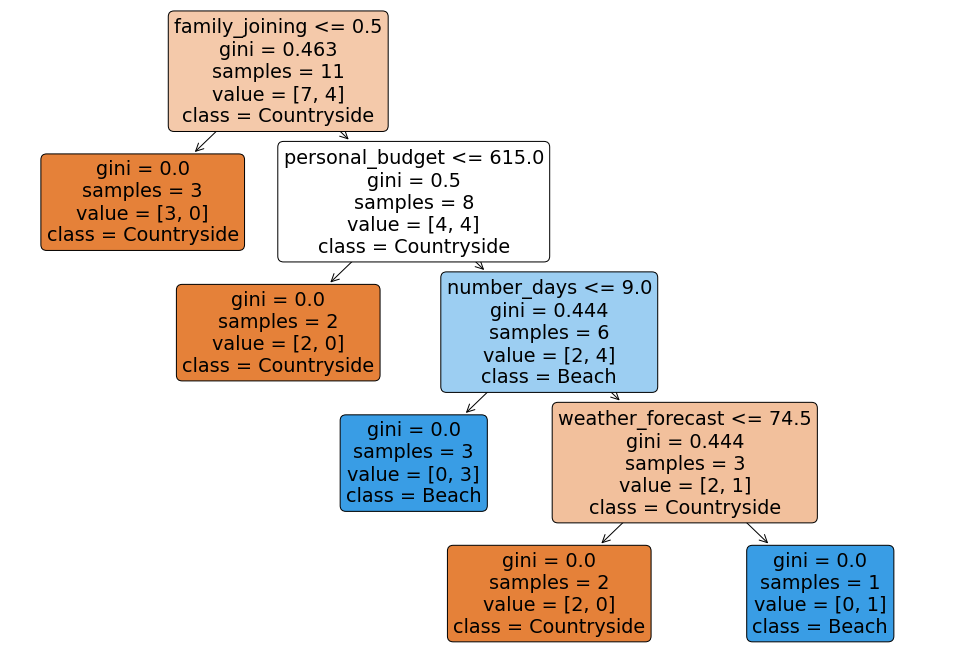

In [5]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def print_feature_importance(names_array, importances_array):
    """ Prints out a feature importance array as a dataframe. """
    importances = pd.DataFrame(data=names_array)
    importances[1] = importances_array
    importances = importances.T
    importances.drop(0, axis=0, inplace=True)
    importances.columns = feature_names
    
    print(str(importances.reset_index(drop=True)))

def build_tree(features, targets, feature_names, class_names):
    """ Builds a decision tree.
        Prints out the decision tree 1) as a plot, 2) as text.
        Also outputs: 1) feature importance, 2) training set and test set mean accuracy of tree
    
        :param features: model features
        :param targets: model targets
        :param feature_names: names of the dataset features
    """
  
    train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=123)

    decision_tree = tree.DecisionTreeClassifier(random_state=456)
    decision_tree = decision_tree.fit(train_features, train_targets)
    # Visualizing the decision tree
    
    # 1. Saving the image of the decision as a png   

    plt.subplots(figsize=(17, 12))
    tree.plot_tree(decision_tree, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)
    plt.savefig("decision_tree.png")
    # 2. Output the tree as text in the console
    tree_as_text = tree.export_text(decision_tree, feature_names=feature_names)
    print(tree_as_text)
    # Feature Importance
    # Turns the feature importance array into a dataframe, so it has a table-like output format
    print_feature_importance(feature_names, decision_tree.feature_importances_)
    # Training and test mean accuracy
    train_error = np.round(decision_tree.score(train_features, train_targets), 2)
    test_error = np.round(decision_tree.score(test_features, test_targets), 2)
    
    print("Training Set Mean Accuracy = " + str(train_error))
    print("Test Set Mean Accuracy = " + str(test_error))

build_tree(features, targets, feature_names, class_names)


# Building the model and visualizing the tree
By default ScikitLearn uses Gini Impurity as a loss function. But you can also use Entropy as the loss function and tune other parameters in the DecisionTreeClassifier.

With the model trained, you can visualize the resulting decision tree with the plot_tree method, and save as decision_tree.png.

# Feature Importances
But there’s something wrong with that decision tree!

You noticed the feature explore_new_places doesn’t show up anywhere. Even though you’re sure it’s an important part of your decision process.

To get to the bottom of this and understand why explore_new_places is not used in the model you lookup the feature_importances_ property in the decision tree model. This will tell you how much each features contributes to the accuracy of the model.

The feature_importances_ property is simply an array of values, with each value corresponding to a feature of the model, with the same order as the input dataset.

explore_new_places has a feature importance of 0, which means it’s not used at all in the prediction.

At first glance you might be thinking, I can just get rid of this feature.

But feature importance doesn’t necessarily mean the feature is never going to be used in the model. It only means it was not used in this tree, which as a specific training-test split.

So you can’t eliminate this feature right away.

To confirm that explore_new_places is not relevant to the model, you can build several trees with different train-test splits f the dataset and check if explore_new_places still has zero importance.

# Model Performance
Finally, to evaluate the algorithm’s performance you calculate the mean accuracy of the predictions on both the training and test sets, using the score method.

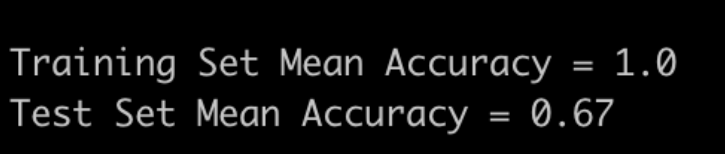

As you can see, this model is overfit and memorized the training set. And with a 67% of mean accuracy for the test set, it doesn’t generalize very well to observations it has never seen before.

# One Decision Tree is not enough
Despite their advantages, Decision Trees don’t provide the same level of accuracy as other classification and regression algorithms.

Decision trees are prone to overfitting. If you build a very tall tree, splitting the feature set until you get pure leaf nodes, you’re likely overfitting the training set. The resulting tree is so complex that it’s also hard to read and interpret.

On the other hand, if your decision tree is very small it underfits the data, resulting in high bias.

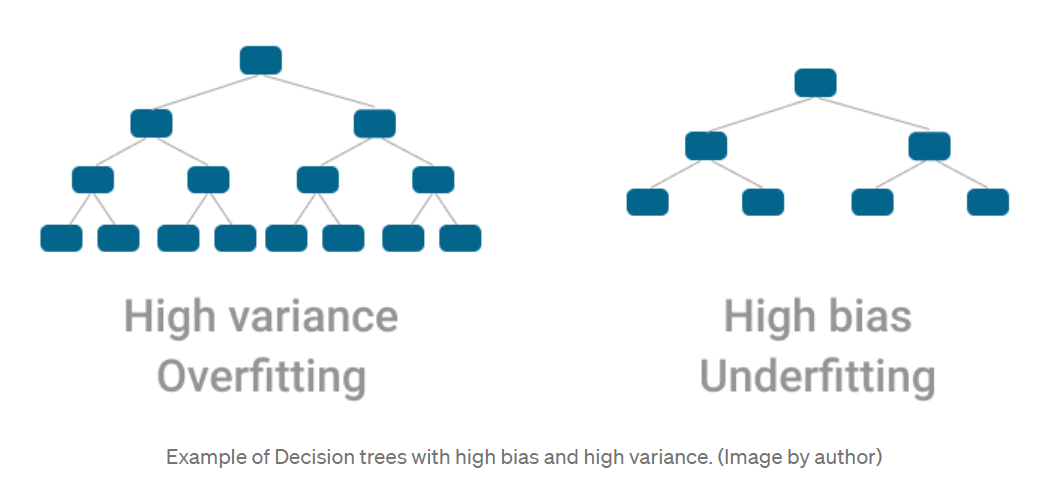

The power hidden in the forest
A single Decision Tree by itself has subpar accuracy, when compared to other machine learning algorithms. One tree alone typically doesn’t generate the best predictions, but the tree structure makes it easy to control the bias-variance trade-off.

A single Decision Tree is not powerful enough, but an entire forest is!

In algorithms that combine multiple trees and control for bias or variance, like Random Forests, the model has a much better performance when compared to a single decision tree.



# Conclusion
Decision trees are a rule-based approach to classification and regression problems. They use the values in each feature to split the dataset to a point where all data points that have the same class are grouped together.

However, there’s a clear trade-off between interpretability and performance.

You can easily visualize and interpret a small tree, but it has high variance. A small change in the training set, may result in a completely different tree, and completely different predictions.

On the other hand, a tall tree with multiple splits generates better classifications. But it’s likely memorizing the training dataset. So it not good at classifying data it has never seen before.

* Extra References:
1. https://chirag-sehra.medium.com/decision-trees-explained-easily-28f23241248

2. https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/